### GRIP : The Spark Foundation (Data Science & Business Analytics Intern)

### Name : Rohan Patil

#### Task 2: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

#### Unsupervised learning is a type of algorithm that learns patterns from untagged data

### Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

It is **very important to note, we actually have the labels for this data set, but we will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.** 

### Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

### Loading dataset

In [3]:
data = pd.read_csv("Iris.csv",index_col=0)

### Checking shape of dataset

In [4]:
data.shape

(150, 5)

### Some statistics of dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Head of dataset

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


## EDA

It's time to create some data visualizations!

**A scatterplot of Petal Length versus Petal Width where the points are colored by the species column.**

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


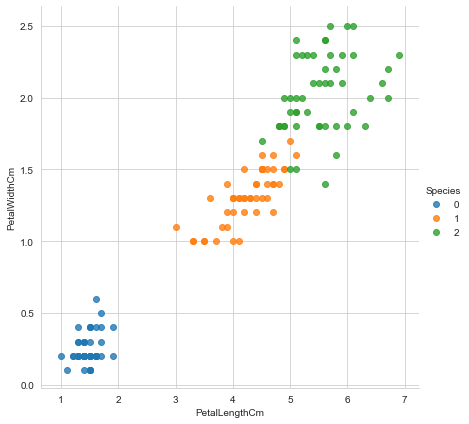

In [9]:
sns.set_style('whitegrid')
sns.lmplot('PetalLengthCm','PetalWidthCm',data=data, hue='Species'
           ,size=6,aspect=1,fit_reg=False)

**A stacked histogram showing Petal Length based on the Species column.** 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


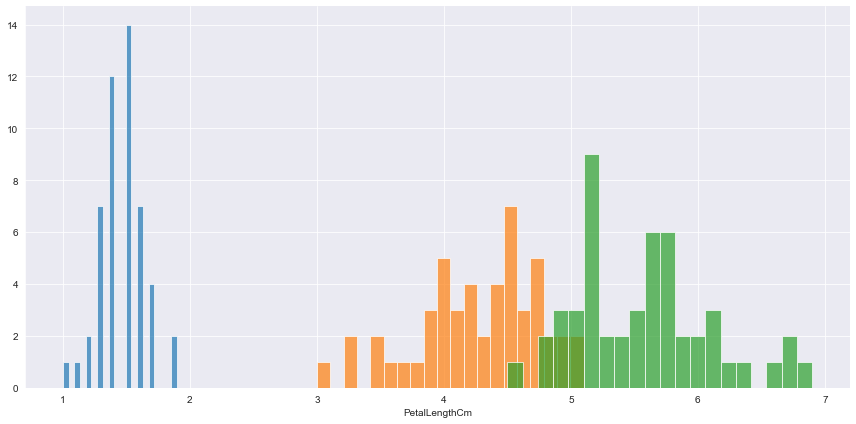

In [10]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data,hue="Species",size=6,aspect=2)
g = g.map(plt.hist,'PetalLengthCm',bins=20,alpha=0.7)

**A stacked histogram showing Petal Width based on the Species column.** 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


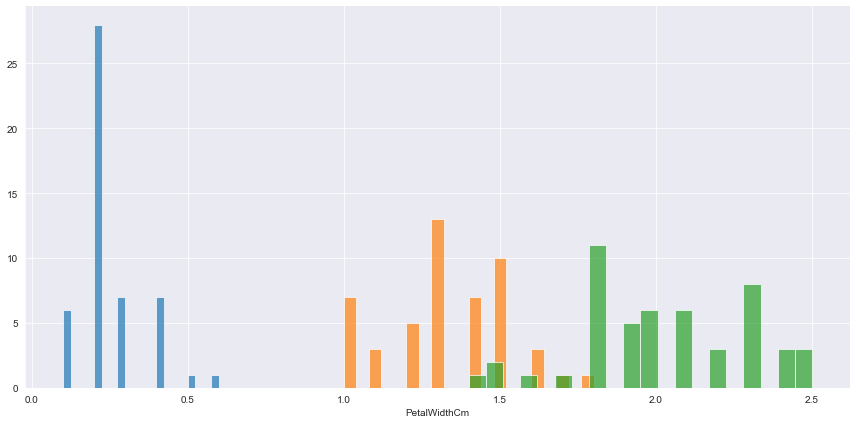

In [11]:
sns.set_style('darkgrid')
g = sns.FacetGrid(data,hue="Species",size=6,aspect=2)
g = g.map(plt.hist,'PetalWidthCm',bins=20,alpha=0.7)

### Dropping Species Column

In [13]:
x=data.drop('Species',axis=1)
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


## K Means Cluster Creation
**Note that, I have taken 3 clusters**

In [14]:
kmeans = KMeans(n_clusters=3)

In [15]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
kmeans.inertia_

78.94084142614602

In [17]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [18]:
prediction = kmeans.predict(x)

### Plotting scatterplot of newly created cluster for Sepal Length and Petal Length features

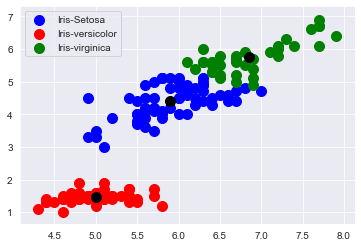

In [23]:
plt.scatter(x.iloc[prediction == 0, 0], x.iloc[prediction==0, 2], s=100,color="blue",label="Iris-Setosa")
plt.scatter(x.iloc[prediction == 1, 0], x.iloc[prediction==1, 2], s=100,color="red",label="Iris-versicolor")
plt.scatter(x.iloc[prediction == 2, 0], x.iloc[prediction==2, 2], s=100,color="green",label="Iris-virginica")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,2],s=100,color="black")

plt.legend()

### Plotting scatterplot of newly created cluster for Sepal Length and Petal Width features

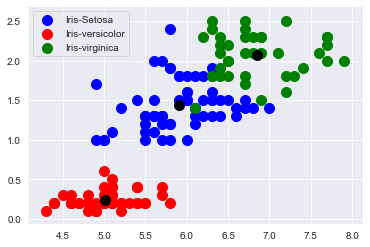

In [22]:
plt.scatter(x.iloc[prediction == 0, 0], x.iloc[prediction==0, 3], s=100,color="blue",label="Iris-Setosa")
plt.scatter(x.iloc[prediction == 1, 0], x.iloc[prediction==1, 3], s=100,color="red",label="Iris-versicolor")
plt.scatter(x.iloc[prediction == 2, 0], x.iloc[prediction==2, 3], s=100,color="green",label="Iris-virginica")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,3],s=100,color="black")

plt.legend()

### Plotting scatterplot of newly created cluster for Petal Length and Petal Width features

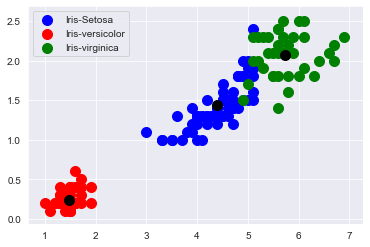

In [24]:
plt.scatter(x.iloc[prediction == 0, 2], x.iloc[prediction==0, 3], s=100,color="blue",label="Iris-Setosa")
plt.scatter(x.iloc[prediction == 1, 2], x.iloc[prediction==1, 3], s=100,color="red",label="Iris-versicolor")
plt.scatter(x.iloc[prediction == 2, 2], x.iloc[prediction==2, 3], s=100,color="green",label="Iris-virginica")

plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],s=100,color="black")

plt.legend()